In [1]:
import numpy as np

def generate_lora_signal(sf, B, symbol, spc=1):
    """
    Genera la señal LoRa para un símbolo dado.

    Parameters:
    sf (int): Spreading Factor.
    B (float): Ancho de banda.
    symbol (int): Símbolo a modular.
    spc (int): Samples per chip.

    Returns:
    np.array: Señal LoRa generada.
    """
    N = 2**sf  # Número de chips por símbolo
    T_s = N / B  # Duración del símbolo
    T = 1 / (B * spc)  # Período de muestreo
    k = np.arange(N * spc)  # Índices de tiempo

    # Generar la señal LoRa
    c_t = (1 / np.sqrt(N)) * np.exp(
        1j * 2 * np.pi * (((symbol + k / spc) % N) / N) * (k / spc)
    )

    return c_t


In [2]:
def demodulate_lora_signal(sf, B, received_signal, spc=1):
    """
    Demodula la señal LoRa recibida.

    Parameters:
    sf (int): Spreading Factor.
    B (float): Ancho de banda.
    received_signal (np.array): Señal LoRa recibida.
    spc (int): Samples per chip.

    Returns:
    int: Símbolo demodulado.
    """
    N = 2**sf  # Número de chips por símbolo
    T_s = N / B  # Duración del símbolo
    T = 1 / (B * spc)  # Período de muestreo
    k = np.arange(N * spc)  # Índices de tiempo

    # Generar el "downchirp"
    downchirp = (1 / np.sqrt(N)) * np.exp(
        -1j * 2 * np.pi * (k / spc) * (k / (spc * N))
    )

    # Multiplicar la señal recibida por el downchirp
    dechirped_signal = received_signal * downchirp

    # Aplicar la FFT para obtener el símbolo
    fft_result = np.fft.fft(dechirped_signal)
    symbol = np.argmax(np.abs(fft_result)) % N

    return symbol


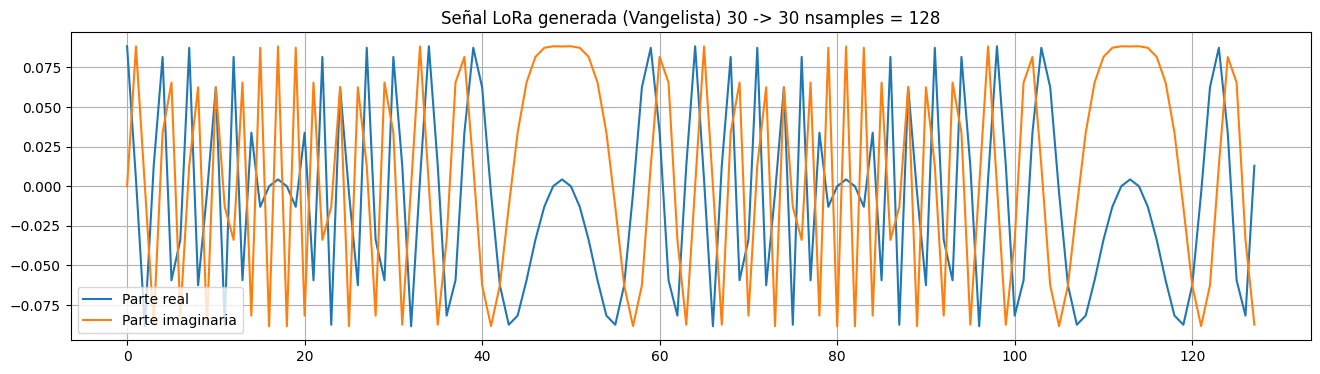

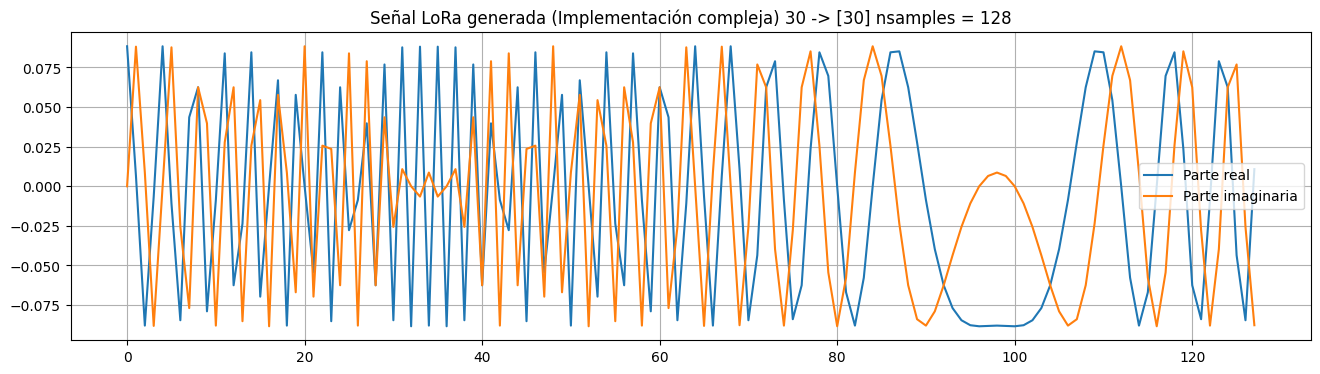

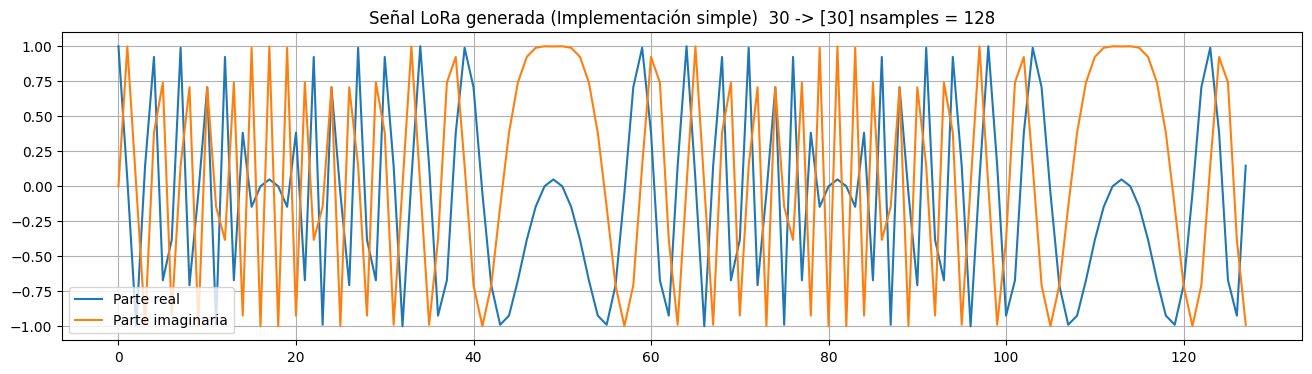

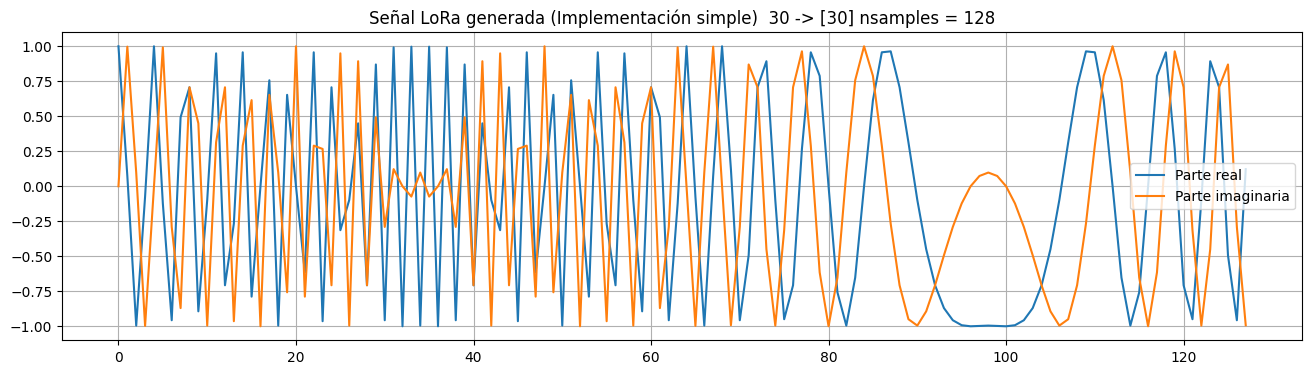

In [4]:
from matplotlib import pyplot as plt
from lora_modem import LoraModulator, LoraDemodulator, SimpleLoraMoDem, AnotherSimpleLoraMoDem
# Parámetros
sf = 7  # Spreading Factor
B = 125e3  # Ancho de banda en Hz
spc = 1
symbol = 30  # Símbolo a transmitir



plt.figure(figsize=(16, 4))
rx_signal = generate_lora_signal(sf, B, symbol, spc)
rx_symbol = demodulate_lora_signal(sf, B, rx_signal, spc)
plt.title(f"Señal LoRa generada (Vangelista) {symbol} -> {rx_symbol} nsamples = {len(rx_signal)}")
plt.plot(np.real(rx_signal), label="Parte real")
plt.plot(np.imag(rx_signal), label="Parte imaginaria")
plt.legend()
plt.grid()
plt.show()

modulator = LoraModulator(sf, B, spc)
demodulator = LoraDemodulator(sf, B, spc)
plt.figure(figsize=(16, 4))
aux_symbol = [symbol]
rx_signal = modulator.modulate_symbols(aux_symbol)[2]
rx_symbol = demodulator.demodulate_symbols(rx_signal)
plt.title(f"Señal LoRa generada (Implementación compleja) {symbol} -> {rx_symbol} nsamples = {len(rx_signal)}")
plt.plot(np.real(rx_signal), label="Parte real")
plt.plot(np.imag(rx_signal), label="Parte imaginaria")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(16, 4))
simple_modem = SimpleLoraMoDem(sf, B, spc)
aux_symbol = [symbol]
rx_signal = simple_modem.modulate_symbols(aux_symbol)
rx_symbol = simple_modem.demodulate_symbols(rx_signal)
plt.title(f"Señal LoRa generada (Implementación simple)  {symbol} -> {rx_symbol} nsamples = {len(rx_signal)}")
plt.plot(np.real(rx_signal), label="Parte real")
plt.plot(np.imag(rx_signal), label="Parte imaginaria")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(16, 4))
simple_modem = AnotherSimpleLoraMoDem(sf, B, spc)
aux_symbol = [symbol]
rx_signal = simple_modem.modulate_symbols(aux_symbol)
rx_symbol = simple_modem.demodulate_symbols(rx_signal)
plt.title(f"Señal LoRa generada (Implementación simple)  {symbol} -> {rx_symbol} nsamples = {len(rx_signal)}")
plt.plot(np.real(rx_signal), label="Parte real")
plt.plot(np.imag(rx_signal), label="Parte imaginaria")
plt.legend()
plt.grid()
plt.show()